# Data Exploration for NExt dataset. 

## Install AMPL

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import gc

In [4]:
! pip install rdkit-pypi
! pip install deepchem==2.6.1
!pip install --upgrade gspread
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.3 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 608 kB 3.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40 kB 5.0 MB/s 
  Attempting uninstall: gspread
    Found existing installation: gspread 3.4.2
    Uninstalling gspread-3.4.2:
      Successfully uninstalled gspread-3.4.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 662 kB 13.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [6]:
import torch

!pip uninstall torch-scatter torch-sparse torch-geometric torch-cluster  --y
!pip install torch-scatter -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cu116.html
     |████████████████████████████████| 9.4 MB 14.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cu116.html
     |████████████████████████████████| 4.6 MB 16.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.13.0+cu116.html
     |████████████████████████████████| 3.2 MB 15.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-qqqwqyyr
  Running command git clone -q https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-qqqwqyyr
     |███████████████████████

In [5]:
import deepchem
# print(deepchem.__version__)
! pip install umap
! pip install llvmlite
! pip install umap-learn
! pip install molvs
! pip install bravado

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3565 sha256=1a2d6dcdf1390ffe9a78b558ec88db4f9136a37b991be1b61ca7cd92391625df
  Stored in directory: /root/.cache/pip/wheels/d4/13/91/2e752dc8dab5df027854bd33d2b65e1dc5cdc107fd1133990f
Successfully built umap
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 6.3 MB/s 
     |████████████████████████████████| 1.1 MB 65.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=546591dee22ccc10d9f98edac9fdb4db9b3dab8fc9ab99fbc817d9e96479b67b
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynnde

In [8]:
import deepchem as dc

# get the Install AMPL_GPU_test.sh
!wget 'https://raw.githubusercontent.com/ATOMScience-org/AMPL/master/atomsci/ddm/examples/tutorials/config/install_AMPL_GPU_test.sh'

# run the script to install AMPL
! chmod u+x install_AMPL_GPU_test.sh
! ./install_AMPL_GPU_test.sh

--2022-12-10 03:58:01--  https://raw.githubusercontent.com/ATOMScience-org/AMPL/master/atomsci/ddm/examples/tutorials/config/install_AMPL_GPU_test.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 179 [text/plain]
Saving to: ‘install_AMPL_GPU_test.sh’

install_AMPL_GPU_te 100%[===================>]     179  --.-KB/s    in 0s      

2022-12-10 03:58:02 (7.60 MB/s) - ‘install_AMPL_GPU_test.sh’ saved [179/179]

Cloning into 'AMPL'...
remote: Enumerating objects: 7661, done.
remote: Counting objects: 100% (1049/1049), done.
remote: Compressing objects: 100% (519/519), done.
remote: Total 7661 (delta 572), reused 901 (delta 515), pack-reused 6612
Receiving objects: 100% (7661/7661), 104.01 MiB | 16.53 MiB/s, done.
Resolving deltas: 100% (4683/4683), done.
Alread

## Exploring relationship between docking score and smile
## Data source = AMPC

In [2]:
import warnings
warnings.filterwarnings('ignore')
import json
import requests
import sys

In [9]:
# Import AMPL libraries
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.diversity_plots as dp
import atomsci.ddm.pipeline.chem_diversity as cd
import atomsci.ddm.pipeline.model_pipeline as mp
import atomsci.ddm.pipeline.parameter_parser as parse
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.utils.struct_utils as struct_utils
from atomsci.ddm.pipeline import perf_plots as pp
# Additional python libraries
import pandas as pd
import numpy as np
import getpass, os

In [10]:
from google.colab import drive
drive.mount("/content/drive")
os.chdir('drive/MyDrive/Colab Notebooks')
result_dir='drive/MyDrive/Colab Notebooks'

Mounted at /content/drive


In [ ]:
# curate data
def curate(df):
# column: Response values column
  column = 'score'

# tolerance: Percentage of individual respsonse values allowed to different from 
# the average to be included in averaging
  tolerance = 5

# list_bad_duplicates: Print structures with bad duplicates
  list_bad_duplicates = 'Yes'

# max_std: Maximum allowed standard deviation for computed average response value
# NOTE: In this example, we set this value very high to disable this feature
  max_std = 0.5

# compound_id: Compound ID column
  compound_id = 'compound_id'

# smiles_col: SMILES column
  smiles_col = 'rdkit_smiles'

# column that will be averaged ; smiles_col; used to find the replicates
# 

  curated_df = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                       list_bad_duplicates, 
                                                       df, max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)
  return curated_df


# Modeling with diversity_3500_scores

In [ ]:
!pip install --upgrade gspread
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Metrics

In [ ]:
from sklearn import metrics
def active(ls,percentage=0.04,n=0):
     total=len(ls)
     ls=ls.rank(ascending=True)
     if n==0:
        newls=np.where(ls<=total*percentage,1,0)
     else:
        newls=np.where(ls<=n,1,0)
     return newls

# Active learning

## Round 1

### Load Full data

In [ ]:
from rdkit import rdBase, Chem, DataStructs
from rdkit.Chem import AllChem, Draw, Descriptors, PandasTools
import pandas as pd

In [ ]:
#Fulldata = pd.read_csv('glide_cenpe_NExT-PL.csv')
#Fulldata = Fulldata.rename(columns={'docking score':'score','SMILES':'smiles','Title':'compound_id'})
#Fulldata = Fulldata[['compound_id','smiles','score']]

In [ ]:
#Fulldata.loc[78116,'smiles']='C(C)[C@H]1NC(=O)[C@@H](NC(=O)c2ccc(C)c3oc4c(C)c(=O)c(N)c(C(=O)N[C@H]5[C@@H](C)OC(=O)[C@H](C(C)C)N(C)C(=O)CN(C)C(=O)[C@@H]6CCCN6C(=O)[C@H](NC5=O)C(C)C)c4nc23)[C@@H](C)OC(=O)[C@H](C(C)C)N(C)C(=O)CN(C)C(=O)[C@@H]7CCCN7C1=O'

In [ ]:
#Fulldata['rdkit_smiles'] = Fulldata['smiles'].apply(curate_data.base_smiles_from_smiles)
#Fulldata = curate(Fulldata)

In [ ]:
#Fulldata = Fulldata.drop(np.where(Fulldata.applymap(lambda x: x == ''))[0][0])

### Train

In [ ]:
Fulldata=pd.read_csv('Fulldata.csv')

In [ ]:
sample_df=Fulldata.sample(n=3500,replace=False,random_state=123)

In [ ]:
sample_df.to_csv('sample_3500.csv')

In [ ]:
response_cols = ['VALUE_NUM_mean']
dataset_key = 'sample_3500.csv'
params1={"datastore": "False",
        "save_results": "False",
        "splitter": "scaffold",
        "id_col": 'compound_id',
        "smiles_col": 'rdkit_smiles',
        "response_cols": response_cols,
        "system": "LC",
        "transformers": "True",
        "model_type": "NN",
        "prediction_type": "regression",
        "featurizer": "graphconv",
        "descriptor_type": "graphconv",
        "learning_rate": "0.001057",
        "layer_sizes": "64,64,32",
        "dropouts" : "0.4,0.4,0.4",
        "save_results": "False",
        "max_epochs": "50",
        "verbose": "True",
        "split_valid_frac": 0.15,
        "split_test_frac": 0.15,
        "result_dir": result_dir,
        "dataset_key": dataset_key}
tp1 = parse.wrapper(params1)
NN1 = mp.ModelPipeline(tp1)
NN1.train_model()

INFO:ATOM:Created a dataset hash '6e7708303962d45dfb476f6c73bee5dd' from dataset_key '/content/drive/MyDrive/Colab Notebooks/sample_3500.csv'
DEBUG:ATOM:Attempting to load featurized dataset
DEBUG:ATOM:Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
INFO:ATOM:Featurized dataset not previously saved for dataset sample_3500, creating new
INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000


Number of features: 75


INFO:ATOM:Wrote transformers to drive/MyDrive/Colab Notebooks/sample_3500/NN_graphconv_scaffold_regression/c833b52d-c2f6-4acc-8932-cc80aaec8702/transformers.pkl
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Total score for epoch 0 is -0.981
INFO:ATOM:Epoch 0: training r2_score = -0.985, validation r2_score = -0.981, test r2_score = -1.175
INFO:ATOM:*** Total score for epoch 1 is -0.00102, is new maximum
INFO:ATOM:Epoch 1: training r2_score = -0.068, validation r2_score = -0.001, test r2_score = -0.091
INFO:ATOM:*** Total score for epoch 2 is 0.0416, is new maximum
INFO:ATOM:Epoch 2: training r2_score = 0.000, validation r2_score = 0.042, test r2_score = -0.049
INFO:ATOM:*** Total score for epoch 3 is 0.0662, is new maximum
INFO:ATOM:Epoch 3: training r2_score = -0.022, validation r2_score = 0.066, test r2_score = -0.043
INFO:ATOM:*** Total score for epoch 4 is 0.124, is new maximum
INFO:ATOM:Epoch 4: training r2

### Prediction

In [ ]:
result1 = NN1.predict_on_dataframe(Fulldata, contains_responses=True)

INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000
INFO:ATOM:Featurizing sample 4000
INFO:ATOM:Featurizing sample 5000
INFO:ATOM:Featurizing sample 6000
INFO:ATOM:Featurizing sample 7000
INFO:ATOM:Featurizing sample 8000
INFO:ATOM:Featurizing sample 9000
INFO:ATOM:Featurizing sample 10000
INFO:ATOM:Featurizing sample 11000
INFO:ATOM:Featurizing sample 12000
INFO:ATOM:Featurizing sample 13000
INFO:ATOM:Featurizing sample 14000
INFO:ATOM:Featurizing sample 15000
INFO:ATOM:Featurizing sample 16000
INFO:ATOM:Featurizing sample 17000
INFO:ATOM:Featurizing sample 18000
INFO:ATOM:Featurizing sample 19000
INFO:ATOM:Featurizing sample 20000
INFO:ATOM:Featurizing sample 21000
INFO:ATOM:Featurizing sample 22000
INFO:ATOM:Featurizing sample 23000
INFO:ATOM:Featurizing sample 24000
INFO:ATOM:Featurizing sample 25000
INFO:ATOM:Featurizing sample 26000
INFO:ATOM:Featurizing sample 27000
INFO:ATOM:Featurizing sample 2800

number of features: 75


INFO:ATOM:Transforming response data
INFO:ATOM:Predicting values for current model


In [ ]:
result1.head()

,compound_id,rdkit_smiles,actual,pred
0,CPD000650511,COc1ccc(C2c3[nH]c4ccccc4c3C[C@H]3C(=O)N(c4cccc...,-11.024,-7.028153
1,CPD000650522,CSCC[C@H](NC(=O)[C@H](Cc1ccccc1)n1c(=O)[nH]c2c...,-10.762,-7.322150
2,CPD000650539,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)n1c(=O)[nH]c...,-10.621,-7.300847
3,CPD002370502,Cc1cccc(-n2c(Cc3cc(=O)[nH]c(=O)[nH]3)nnc2SCC(=...,-10.564,-6.140664
4,CPD002487882,Cc1oc2cc(OCC(=O)N[C@H](C)C(=O)O)ccc2c(=O)c1-c1...,-10.542,-7.761111


In [ ]:
#next round data
result1=result1.sort_values(by=['pred'],ascending=True)
round1=result1.iloc[:3500,:]
round1.head()

,compound_id,rdkit_smiles,actual,pred
503,CPD002438974,O=C(O)c1ccc(Cc2ccc(C(=O)O)o2)o1,-9.095,-8.279424
1214,CPD000122830,O=C(O)c1ccc2[nH]c(CO)nc2c1,-8.596,-8.211966
1599,CPD002366465,O=C(O)c1ccc(C[S+]([O-])c2ccc(F)cc2)o1,-8.391,-8.194147
1015,CPD002441892,O=C(O)c1ccc(-c2ccc(Cc3ccc(-c4ccc(C(=O)O)cc4)o3...,-8.713,-8.185168
2180,CPD000172105,O=C(O)c1ccc(-c2ccc(CO)o2)cc1,-8.147,-8.179309


In [ ]:
result1.to_csv('result1.csv')

### Evaluate

In [ ]:
def myevaluate(df,p=0.04,n=0):
  y_true=df['actual']
  y_pred=df['pred']
  if n==0:
    y_true=active(y_true,percentage=p)
    y_pred=active(y_pred,percentage=p)
  else:
    y_true=active(y_true,n=n)
    y_pred=active(y_pred,n=n)
  results={}
  results['accuracy']=metrics.accuracy_score(y_true, y_pred)
  results['precision']=metrics.precision_score(y_true, y_pred)
  results['recall']=metrics.recall_score(y_true, y_pred)
  results['f1_score']=metrics.f1_score(y_true, y_pred)
  results['auc_roc']=metrics.roc_auc_score(y_true, y_pred)
  return results
myevaluate(result1,n=3500)

{'accuracy': 0.9681298351833165,
 'precision': 0.6208571428571429,
 'recall': 0.6210345813089454,
 'f1_score': 0.6209458494070582,
 'auc_roc': 0.8021970197910956}

## Round 2

### Merge

In [ ]:
df=sample_df[['compound_id','rdkit_smiles','score']]
round_data=round1.rename(columns={'actual':'score'})
round_data=round_data[['compound_id','rdkit_smiles','score']]

In [ ]:
train2 = pd.concat([df, round_data], ignore_index=True)
train2['compound_id']=train2['compound_id'].astype(str)
train2.shape

(7000, 3)

In [ ]:
del df,round1,round_data

In [ ]:
train2=curate(train2)

Bad duplicates removed from dataset
Dataframe size (7000, 7)
List of 'bad' duplicates removed
Empty DataFrame
Columns: [compound_id, score, VALUE_NUM_mean, Perc_Var, VALUE_NUM_std]
Index: []

Dataset de-duplicated
Dataframe size (6847, 7)
New column created with averaged values:  VALUE_NUM_mean


In [ ]:
train2.to_csv('train2_data.csv')

### Train

In [ ]:
response_cols = ['VALUE_NUM_mean']
dataset_key = 'train2_data.csv'
params2={"datastore": "False",
        "save_results": "False",
        "splitter": "scaffold",
        "id_col": 'compound_id',
        "smiles_col": 'rdkit_smiles',
        "response_cols": response_cols,
        "system": "LC",
        "transformers": "True",
        "model_type": "NN",
        "prediction_type": "regression",
        "featurizer": "graphconv",
        "descriptor_type": "graphconv",
        "learning_rate": "0.001057",
        "layer_sizes": "64,64,32",
        "dropouts" : "0.4,0.4,0.4",
        "save_results": "False",
        "max_epochs": "50",
        "verbose": "True",
        "split_valid_frac": 0.15,
        "split_test_frac": 0.15,
        "result_dir": result_dir,
        "dataset_key": dataset_key}
tp2 = parse.wrapper(params2)
NN2 = mp.ModelPipeline(tp2)
NN2.train_model()

INFO:ATOM:Created a dataset hash 'b8c2406a852b90eea7290a40f3963a4c' from dataset_key '/content/drive/MyDrive/Colab Notebooks/train2_data.csv'
DEBUG:ATOM:Attempting to load featurized dataset
DEBUG:ATOM:Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
INFO:ATOM:Featurized dataset not previously saved for dataset train2_data, creating new
INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000
INFO:ATOM:Featurizing sample 4000
INFO:ATOM:Featurizing sample 5000
INFO:ATOM:Featurizing sample 6000


Number of features: 75


INFO:ATOM:Wrote transformers to drive/MyDrive/Colab Notebooks/train2_data/NN_graphconv_scaffold_regression/26e221a7-7c71-494b-b349-86e9335a2c81/transformers.pkl
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Total score for epoch 0 is -2.25
INFO:ATOM:Epoch 0: training r2_score = 0.102, validation r2_score = -2.250, test r2_score = -2.464
INFO:ATOM:Epoch 1: training r2_score = 0.142, validation r2_score = -2.554, test r2_score = -2.966
INFO:ATOM:Epoch 2: training r2_score = 0.088, validation r2_score = -3.146, test r2_score = -3.628
INFO:ATOM:*** Total score for epoch 3 is -1.87, is new maximum
INFO:ATOM:Epoch 3: training r2_score = 0.289, validation r2_score = -1.868, test r2_score = -2.283
INFO:ATOM:*** Total score for epoch 4 is -0.836, is new maximum
INFO:ATOM:Epoch 4: training r2_score = 0.386, validation r2_score = -0.836, test r2_score = -1.109
INFO:ATOM:Epoch 5: training r2_score = 0.408, validation r2_sco

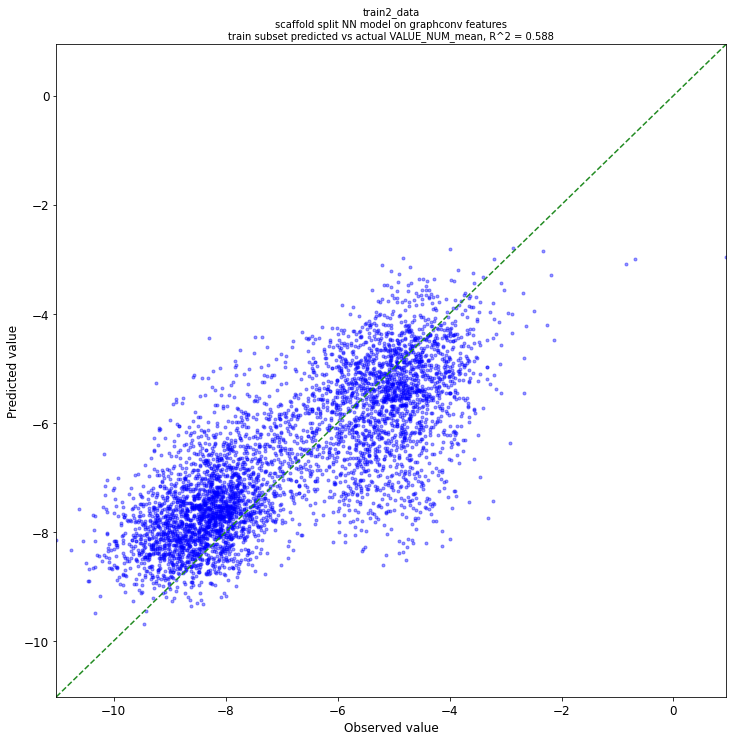

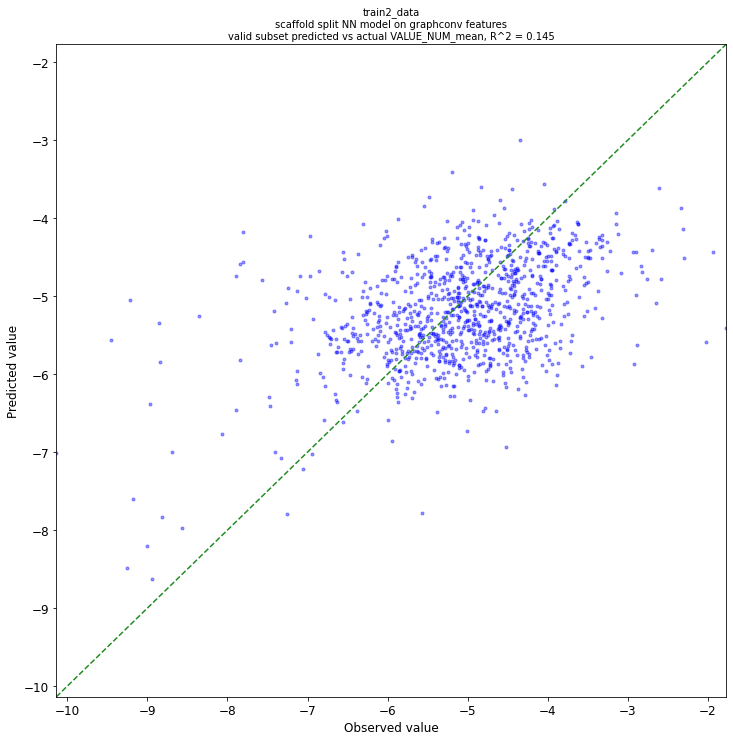

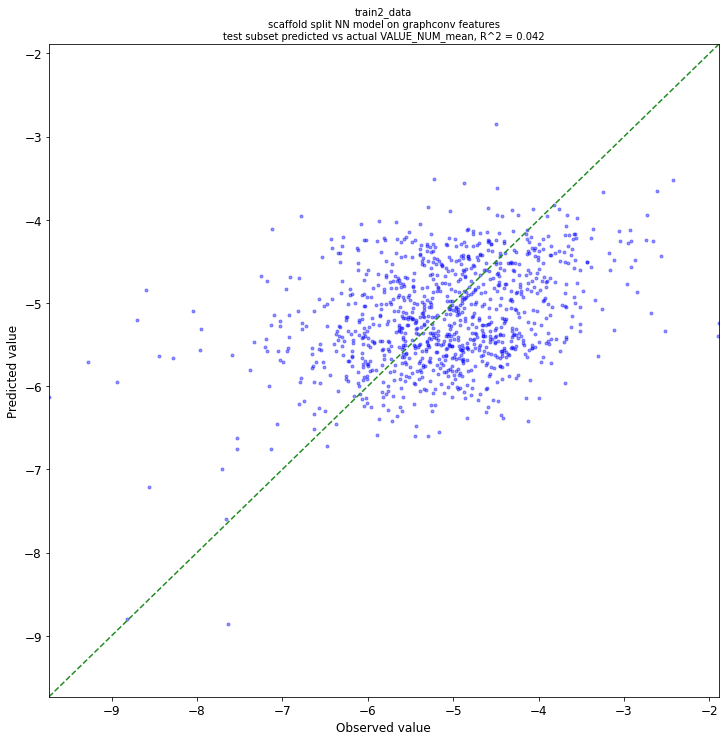

In [ ]:
pp.plot_pred_vs_actual(NN2)

### Prediction

In [ ]:
result2 = NN2.predict_on_dataframe(Fulldata, contains_responses=True)

INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000
INFO:ATOM:Featurizing sample 4000
INFO:ATOM:Featurizing sample 5000
INFO:ATOM:Featurizing sample 6000
INFO:ATOM:Featurizing sample 7000
INFO:ATOM:Featurizing sample 8000
INFO:ATOM:Featurizing sample 9000
INFO:ATOM:Featurizing sample 10000
INFO:ATOM:Featurizing sample 11000
INFO:ATOM:Featurizing sample 12000
INFO:ATOM:Featurizing sample 13000
INFO:ATOM:Featurizing sample 14000
INFO:ATOM:Featurizing sample 15000
INFO:ATOM:Featurizing sample 16000
INFO:ATOM:Featurizing sample 17000
INFO:ATOM:Featurizing sample 18000
INFO:ATOM:Featurizing sample 19000
INFO:ATOM:Featurizing sample 20000
INFO:ATOM:Featurizing sample 21000
INFO:ATOM:Featurizing sample 22000
INFO:ATOM:Featurizing sample 23000
INFO:ATOM:Featurizing sample 24000
INFO:ATOM:Featurizing sample 25000
INFO:ATOM:Featurizing sample 26000
INFO:ATOM:Featurizing sample 27000
INFO:ATOM:Featurizing sample 2800

number of features: 75


INFO:ATOM:Transforming response data
INFO:ATOM:Predicting values for current model


In [ ]:
#next round data
result2=result2.sort_values(by=['pred'],ascending=True)
round2=result2.iloc[:3500,:]
round2.head()
result2.to_csv('result2.csv')

### Evaluate

In [ ]:
myevaluate(result2,n=3500)

{'accuracy': 0.9707966940560281,
 'precision': 0.6525714285714286,
 'recall': 0.6527579308373821,
 'f1_score': 0.6526646663809116,
 'auc_roc': 0.8187546629545867}

## Round 3

#### Merge

In [ ]:
df=train2[['compound_id','rdkit_smiles','score']]
round_data=round2.rename(columns={'actual':'score'})
round_data=round_data[['compound_id','rdkit_smiles','score']]

In [ ]:
train3 = pd.concat([df, round_data], ignore_index=True)
train3['compound_id']=train3['compound_id'].astype(str)
train3.shape

(10347, 3)

In [ ]:
del df,round_data,round2,train2

In [ ]:
train3=curate(train3)

Bad duplicates removed from dataset
Dataframe size (10347, 7)
List of 'bad' duplicates removed
Empty DataFrame
Columns: [compound_id, score, VALUE_NUM_mean, Perc_Var, VALUE_NUM_std]
Index: []

Dataset de-duplicated
Dataframe size (7720, 7)
New column created with averaged values:  VALUE_NUM_mean


In [ ]:
train3.to_csv('train3_data.csv')

#### Train

In [ ]:
response_cols = ['VALUE_NUM_mean']
dataset_key = 'train3_data.csv'
params3={"datastore": "False",
        "save_results": "False",
        "splitter": "scaffold",
        "id_col": 'compound_id',
        "smiles_col": 'rdkit_smiles',
        "response_cols": response_cols,
        "system": "LC",
        "transformers": "True",
        "model_type": "NN",
        "prediction_type": "regression",
        "featurizer": "graphconv",
        "descriptor_type": "graphconv",
        "learning_rate": "0.001057",
        "layer_sizes": "64,64,32",
        "dropouts" : "0.4,0.4,0.4",
        "save_results": "False",
        "max_epochs": "50",
        "verbose": "True",
        "split_valid_frac": 0.15,
        "split_test_frac": 0.15,
        "result_dir": result_dir,
        "dataset_key": dataset_key}
tp3 = parse.wrapper(params3)
NN3 = mp.ModelPipeline(tp3)
NN3.train_model()

INFO:ATOM:Created a dataset hash '6dc8783555234911830e8c059263dfd3' from dataset_key '/content/drive/MyDrive/Colab Notebooks/train3_data.csv'
DEBUG:ATOM:Attempting to load featurized dataset
DEBUG:ATOM:Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
INFO:ATOM:Featurized dataset not previously saved for dataset train3_data, creating new
INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000
INFO:ATOM:Featurizing sample 4000
INFO:ATOM:Featurizing sample 5000
INFO:ATOM:Featurizing sample 6000
INFO:ATOM:Featurizing sample 7000


Number of features: 75


INFO:ATOM:Wrote transformers to drive/MyDrive/Colab Notebooks/train3_data/NN_graphconv_scaffold_regression/6dffed59-155b-4232-8d90-388a698be91d/transformers.pkl
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Total score for epoch 0 is -0.72
INFO:ATOM:Epoch 0: training r2_score = -0.289, validation r2_score = -0.720, test r2_score = -2.732
INFO:ATOM:Epoch 1: training r2_score = -0.116, validation r2_score = -0.953, test r2_score = -3.240
INFO:ATOM:*** Total score for epoch 2 is -0.381, is new maximum
INFO:ATOM:Epoch 2: training r2_score = 0.133, validation r2_score = -0.381, test r2_score = -1.860
INFO:ATOM:*** Total score for epoch 3 is -0.134, is new maximum
INFO:ATOM:Epoch 3: training r2_score = 0.231, validation r2_score = -0.134, test r2_score = -1.279
INFO:ATOM:Epoch 4: training r2_score = 0.245, validation r2_score = -0.164, test r2_score = -1.392
INFO:ATOM:*** Total score for epoch 5 is 0.23, is new maximu

#### Prediction

In [ ]:
result3 = NN3.predict_on_dataframe(Fulldata, contains_responses=True)

INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000
INFO:ATOM:Featurizing sample 4000
INFO:ATOM:Featurizing sample 5000
INFO:ATOM:Featurizing sample 6000
INFO:ATOM:Featurizing sample 7000
INFO:ATOM:Featurizing sample 8000
INFO:ATOM:Featurizing sample 9000
INFO:ATOM:Featurizing sample 10000
INFO:ATOM:Featurizing sample 11000
INFO:ATOM:Featurizing sample 12000
INFO:ATOM:Featurizing sample 13000
INFO:ATOM:Featurizing sample 14000
INFO:ATOM:Featurizing sample 15000
INFO:ATOM:Featurizing sample 16000
INFO:ATOM:Featurizing sample 17000
INFO:ATOM:Featurizing sample 18000
INFO:ATOM:Featurizing sample 19000
INFO:ATOM:Featurizing sample 20000
INFO:ATOM:Featurizing sample 21000
INFO:ATOM:Featurizing sample 22000
INFO:ATOM:Featurizing sample 23000
INFO:ATOM:Featurizing sample 24000
INFO:ATOM:Featurizing sample 25000
INFO:ATOM:Featurizing sample 26000
INFO:ATOM:Featurizing sample 27000
INFO:ATOM:Featurizing sample 2800

number of features: 75


INFO:ATOM:Transforming response data
INFO:ATOM:Predicting values for current model


In [ ]:
#next round data
result3=result3.sort_values(by=['pred'],ascending=True)
round3=result3.iloc[:3500,:]
round3.head()
result3.to_csv('result3.csv')

### Evaluate

In [ ]:
myevaluate(result3,n=3500)

{'accuracy': 0.9733674499062995,
 'precision': 0.6831428571428572,
 'recall': 0.6833380965990283,
 'f1_score': 0.6832404629232747,
 'auc_roc': 0.8347156342923664}

Compare the result of each round:

In [ ]:
# round 1
myevaluate(result1,p=0.1)

{'accuracy': 0.8981908606025659,
 'precision': 0.49111004324843827,
 'recall': 0.49093310916296384,
 'f1_score': 0.4910215602666506,
 'auc_roc': 0.717195267690656}

In [ ]:
myevaluate(result1,p=0.2)

{'accuracy': 0.7800201816347124,
 'precision': 0.4500240269101394,
 'recall': 0.4500240269101394,
 'f1_score': 0.4500240269101394,
 'auc_roc': 0.6562691460155838}

In [ ]:
# round 2
myevaluate(result2,p=0.1)

{'accuracy': 0.8886286098697804,
 'precision': 0.44329649207111965,
 'recall': 0.4431367839558064,
 'f1_score': 0.4432166236262087,
 'auc_roc': 0.6906408321450216}

In [ ]:
myevaluate(result2,p=0.2)

{'accuracy': 0.763898899620393,
 'precision': 0.40971888515136956,
 'recall': 0.40971888515136956,
 'f1_score': 0.40971888515136956,
 'auc_roc': 0.6310787350256818}

In [ ]:
# round 3
myevaluate(result3,p=0.1)

{'accuracy': 0.8934577867473932,
 'precision': 0.4674435367611725,
 'recall': 0.4672751290981146,
 'f1_score': 0.4673593177586932,
 'auc_roc': 0.7040514892924399}

In [ ]:
myevaluate(result3,p=0.2)

{'accuracy': 0.7708183172360771,
 'precision': 0.42701826045170593,
 'recall': 0.42701826045170593,
 'f1_score': 0.4270182604517059,
 'auc_roc': 0.6418907147054013}

## More rounds

In [ ]:
def merge(train_df,round_df):
  df=train_df[['compound_id','rdkit_smiles','score']]
  round_data=round_df.rename(columns={'actual':'score'})
  round_data=round_data[['compound_id','rdkit_smiles','score']]
  newtrain = pd.concat([df, round_data], ignore_index=True)
  newtrain['compound_id']=newtrain['compound_id'].astype(str)
  newtrain=curate(newtrain)
  return newtrain

In [ ]:
def fit(dataset_key):
  response_cols = ['VALUE_NUM_mean']
  params={"datastore": "False",
        "save_results": "False",
        "splitter": "scaffold",
        "id_col": 'compound_id',
        "smiles_col": 'rdkit_smiles',
        "response_cols": response_cols,
        "system": "LC",
        "transformers": "True",
        "model_type": "NN",
        "prediction_type": "regression",
        "featurizer": "graphconv",
        "descriptor_type": "graphconv",
        "learning_rate": "0.001057",
        "layer_sizes": "64,64,32",
        "dropouts" : "0.4,0.4,0.4",
        "save_results": "False",
        "max_epochs": "50",
        "verbose": "True",
        "split_valid_frac": 0.15,
        "split_test_frac": 0.15,
        "result_dir": result_dir,
        "dataset_key": dataset_key}
  tp = parse.wrapper(params)
  NN = mp.ModelPipeline(tp)
  NN.train_model()
  return NN

In [ ]:
del NN1,NN2,result1,result2

In [ ]:
train,round=train3,round3

In [ ]:
# round 4
train=merge(train,round)
train.to_csv('train4_data.csv')
NN=fit('train4_data.csv')
result=NN.predict_on_dataframe(Fulldata, contains_responses=True)
result=result.sort_values(by=['pred'],ascending=True)
result.to_csv('result4.csv')
round=result.iloc[:3500,:]

INFO:ATOM:Created a dataset hash '917c551aa7682d8eaa8434c3fefbcb68' from dataset_key '/content/drive/MyDrive/Colab Notebooks/train4_data.csv'
DEBUG:ATOM:Attempting to load featurized dataset
DEBUG:ATOM:Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
INFO:ATOM:Featurized dataset not previously saved for dataset train4_data, creating new


Bad duplicates removed from dataset
Dataframe size (11220, 7)
List of 'bad' duplicates removed
Empty DataFrame
Columns: [compound_id, score, VALUE_NUM_mean, Perc_Var, VALUE_NUM_std]
Index: []

Dataset de-duplicated
Dataframe size (7988, 7)
New column created with averaged values:  VALUE_NUM_mean


INFO:ATOM:Featurizing sample 0
INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000
INFO:ATOM:Featurizing sample 4000
INFO:ATOM:Featurizing sample 5000
INFO:ATOM:Featurizing sample 6000
INFO:ATOM:Featurizing sample 7000


Number of features: 75


INFO:ATOM:Wrote transformers to drive/MyDrive/Colab Notebooks/train4_data/NN_graphconv_scaffold_regression/ce167b10-957e-495f-a893-d292ab566e18/transformers.pkl
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Total score for epoch 0 is -0.26
INFO:ATOM:Epoch 0: training r2_score = 0.027, validation r2_score = -0.260, test r2_score = -2.004
INFO:ATOM:*** Total score for epoch 1 is -0.149, is new maximum
INFO:ATOM:Epoch 1: training r2_score = 0.068, validation r2_score = -0.149, test r2_score = -1.721
INFO:ATOM:*** Total score for epoch 2 is 0.102, is new maximum
INFO:ATOM:Epoch 2: training r2_score = 0.117, validation r2_score = 0.102, test r2_score = -0.989
INFO:ATOM:*** Total score for epoch 3 is 0.173, is new maximum
INFO:ATOM:Epoch 3: training r2_score = 0.201, validation r2_score = 0.173, test r2_score = -0.790
INFO:ATOM:Epoch 4: training r2_score = 0.294, validation r2_score = 0.173, test r2_score = -0.783
INF

number of features: 75


INFO:ATOM:Transforming response data
INFO:ATOM:Predicting values for current model


In [ ]:
myevaluate(result,n=3500)

{'accuracy': 0.9720220075921387,
 'precision': 0.6671428571428571,
 'recall': 0.6673335238639612,
 'f1_score': 0.6672381768824117,
 'auc_roc': 0.826362228732407}

In [ ]:
myevaluate(result,p=0.1)

{'accuracy': 0.8959564653308346,
 'precision': 0.47993753003363765,
 'recall': 0.47976462111204515,
 'f1_score': 0.4798510599963966,
 'auc_roc': 0.7109903367717013}

In [ ]:
myevaluate(result,p=0.2)

{'accuracy': 0.7709144202585171,
 'precision': 0.42725852955309945,
 'recall': 0.42725852955309945,
 'f1_score': 0.42725852955309945,
 'auc_roc': 0.6420408810898419}

In [ ]:
# round 5
train=merge(train,round)
train.to_csv('train5_data.csv')
NN=fit('train5_data.csv')
result=NN.predict_on_dataframe(Fulldata, contains_responses=True)
result=result.sort_values(by=['pred'],ascending=True)
result.to_csv('result5.csv')
round=result.iloc[:3500,:]

INFO:ATOM:Created a dataset hash '40b3d1225cfe2f549feab395274b3137' from dataset_key '/content/drive/MyDrive/Colab Notebooks/train5_data.csv'
DEBUG:ATOM:Attempting to load featurized dataset
DEBUG:ATOM:Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
INFO:ATOM:Featurized dataset not previously saved for dataset train5_data, creating new
INFO:ATOM:Featurizing sample 0


Bad duplicates removed from dataset
Dataframe size (11488, 7)
List of 'bad' duplicates removed
Empty DataFrame
Columns: [compound_id, score, VALUE_NUM_mean, Perc_Var, VALUE_NUM_std]
Index: []

Dataset de-duplicated
Dataframe size (8289, 7)
New column created with averaged values:  VALUE_NUM_mean


INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000
INFO:ATOM:Featurizing sample 4000
INFO:ATOM:Featurizing sample 5000
INFO:ATOM:Featurizing sample 6000
INFO:ATOM:Featurizing sample 7000
INFO:ATOM:Featurizing sample 8000


Number of features: 75


INFO:ATOM:Wrote transformers to drive/MyDrive/Colab Notebooks/train5_data/NN_graphconv_scaffold_regression/fa55bd4c-9c6c-4983-87ef-a7712f549e3a/transformers.pkl
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Total score for epoch 0 is -0.348
INFO:ATOM:Epoch 0: training r2_score = 0.009, validation r2_score = -0.348, test r2_score = -2.560
INFO:ATOM:*** Total score for epoch 1 is -0.145, is new maximum
INFO:ATOM:Epoch 1: training r2_score = 0.162, validation r2_score = -0.145, test r2_score = -2.397
INFO:ATOM:Epoch 2: training r2_score = 0.144, validation r2_score = -0.156, test r2_score = -2.522
INFO:ATOM:*** Total score for epoch 3 is 0.104, is new maximum
INFO:ATOM:Epoch 3: training r2_score = 0.253, validation r2_score = 0.104, test r2_score = -1.555
INFO:ATOM:Epoch 4: training r2_score = 0.196, validation r2_score = -0.054, test r2_score = -2.184
INFO:ATOM:*** Total score for epoch 5 is 0.137, is new maximum


number of features: 75


INFO:ATOM:Transforming response data
INFO:ATOM:Predicting values for current model


In [ ]:
myevaluate(result,n=3500)

{'accuracy': 0.9702200759213877,
 'precision': 0.6457142857142857,
 'recall': 0.645898828236639,
 'f1_score': 0.6458065437919703,
 'auc_roc': 0.8151746320003185}

In [ ]:
myevaluate(result,p=0.1)

{'accuracy': 0.8902863870068713,
 'precision': 0.4515857760691975,
 'recall': 0.4514230815419719,
 'f1_score': 0.45150441414930026,
 'auc_roc': 0.6952444905687623}

In [ ]:
myevaluate(result,p=0.2)

{'accuracy': 0.7615443755706117,
 'precision': 0.40383229216722727,
 'recall': 0.40383229216722727,
 'f1_score': 0.40383229216722727,
 'auc_roc': 0.6273996586068883}

In [ ]:
# round 6
train=merge(train,round)
train.to_csv('train6_data.csv')
NN=fit('train6_data.csv')
result=NN.predict_on_dataframe(Fulldata, contains_responses=True)
result=result.sort_values(by=['pred'],ascending=True)
result.to_csv('result6.csv')
round=result.iloc[:3500,:]
myevaluate(result,n=3500)

INFO:ATOM:Created a dataset hash 'c73fc06a80f3efff32314c4e4d9f6260' from dataset_key '/content/drive/MyDrive/Colab Notebooks/train6_data.csv'
DEBUG:ATOM:Attempting to load featurized dataset
DEBUG:ATOM:Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
INFO:ATOM:Featurized dataset not previously saved for dataset train6_data, creating new
INFO:ATOM:Featurizing sample 0


Bad duplicates removed from dataset
Dataframe size (11789, 7)
List of 'bad' duplicates removed
Empty DataFrame
Columns: [compound_id, score, VALUE_NUM_mean, Perc_Var, VALUE_NUM_std]
Index: []

Dataset de-duplicated
Dataframe size (8524, 7)
New column created with averaged values:  VALUE_NUM_mean


INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000
INFO:ATOM:Featurizing sample 4000
INFO:ATOM:Featurizing sample 5000
INFO:ATOM:Featurizing sample 6000
INFO:ATOM:Featurizing sample 7000
INFO:ATOM:Featurizing sample 8000


Number of features: 75


INFO:ATOM:Wrote transformers to drive/MyDrive/Colab Notebooks/train6_data/NN_graphconv_scaffold_regression/89e74707-13eb-44ff-bc82-69e9378e7d73/transformers.pkl
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Total score for epoch 0 is 0.0633
INFO:ATOM:Epoch 0: training r2_score = 0.028, validation r2_score = 0.063, test r2_score = -1.160
INFO:ATOM:*** Total score for epoch 1 is 0.213, is new maximum
INFO:ATOM:Epoch 1: training r2_score = 0.217, validation r2_score = 0.213, test r2_score = -1.143
INFO:ATOM:Epoch 2: training r2_score = 0.229, validation r2_score = 0.199, test r2_score = -1.327
INFO:ATOM:*** Total score for epoch 3 is 0.296, is new maximum
INFO:ATOM:Epoch 3: training r2_score = 0.277, validation r2_score = 0.296, test r2_score = -0.948
INFO:ATOM:*** Total score for epoch 4 is 0.358, is new maximum
INFO:ATOM:Epoch 4: training r2_score = 0.331, validation r2_score = 0.358, test r2_score = -0.621
INFO:

number of features: 75


INFO:ATOM:Transforming response data
INFO:ATOM:Predicting values for current model


{'accuracy': 0.9738239392628898,
 'precision': 0.6885714285714286,
 'recall': 0.6887682194912832,
 'f1_score': 0.6886698099728532,
 'auc_roc': 0.8375498254644954}

In [ ]:
myevaluate(result,p=0.1)

{'accuracy': 0.8969415213108453,
 'precision': 0.4848630466122057,
 'recall': 0.48468836315599856,
 'f1_score': 0.4847756891477989,
 'auc_roc': 0.7137258439510255}

In [ ]:
myevaluate(result,p=0.2)

{'accuracy': 0.7676709432511652,
 'precision': 0.4191494473810668,
 'recall': 0.4191494473810668,
 'f1_score': 0.4191494473810668,
 'auc_roc': 0.6369727656149733}

In [ ]:
# round 7
train=merge(train,round)
train.to_csv('train7_data.csv')
NN=fit('train7_data.csv')
result=NN.predict_on_dataframe(Fulldata, contains_responses=True)
result=result.sort_values(by=['pred'],ascending=True)
result.to_csv('result7.csv')
round=result.iloc[:3500,:]
myevaluate(result,n=3500)

INFO:ATOM:Created a dataset hash '1f05e30ab29c7849fc9c76c4c04668e3' from dataset_key '/content/drive/MyDrive/Colab Notebooks/train7_data.csv'
DEBUG:ATOM:Attempting to load featurized dataset
DEBUG:ATOM:Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
INFO:ATOM:Featurized dataset not previously saved for dataset train7_data, creating new
INFO:ATOM:Featurizing sample 0


Bad duplicates removed from dataset
Dataframe size (12024, 7)
List of 'bad' duplicates removed
Empty DataFrame
Columns: [compound_id, score, VALUE_NUM_mean, Perc_Var, VALUE_NUM_std]
Index: []

Dataset de-duplicated
Dataframe size (8648, 7)
New column created with averaged values:  VALUE_NUM_mean


INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000
INFO:ATOM:Featurizing sample 4000
INFO:ATOM:Featurizing sample 5000
INFO:ATOM:Featurizing sample 6000
INFO:ATOM:Featurizing sample 7000
INFO:ATOM:Featurizing sample 8000


Number of features: 75


INFO:ATOM:Wrote transformers to drive/MyDrive/Colab Notebooks/train7_data/NN_graphconv_scaffold_regression/8b60cbb2-4e4c-42bd-bc84-8c5cd3a84033/transformers.pkl
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Total score for epoch 0 is -0.0646
INFO:ATOM:Epoch 0: training r2_score = 0.067, validation r2_score = -0.065, test r2_score = -2.193
INFO:ATOM:*** Total score for epoch 1 is 0.129, is new maximum
INFO:ATOM:Epoch 1: training r2_score = 0.168, validation r2_score = 0.129, test r2_score = -1.381
INFO:ATOM:*** Total score for epoch 2 is 0.275, is new maximum
INFO:ATOM:Epoch 2: training r2_score = 0.249, validation r2_score = 0.275, test r2_score = -0.847
INFO:ATOM:*** Total score for epoch 3 is 0.341, is new maximum
INFO:ATOM:Epoch 3: training r2_score = 0.274, validation r2_score = 0.341, test r2_score = -0.685
INFO:ATOM:Epoch 4: training r2_score = 0.205, validation r2_score = 0.265, test r2_score = -0.983
INF

number of features: 75


INFO:ATOM:Transforming response data
INFO:ATOM:Predicting values for current model


{'accuracy': 0.9740401710633799,
 'precision': 0.6911428571428572,
 'recall': 0.6913403829665619,
 'f1_score': 0.6912416059437062,
 'auc_roc': 0.8388923370723461}

In [ ]:
myevaluate(result,p=0.1)

{'accuracy': 0.894659074527894,
 'precision': 0.47345026429601156,
 'recall': 0.47327969256635044,
 'f1_score': 0.4733649630652814,
 'auc_roc': 0.7073874736574695}

In [ ]:
myevaluate(result,p=0.2)

{'accuracy': 0.7661573206477343,
 'precision': 0.4153652090341182,
 'recall': 0.4153652090341182,
 'f1_score': 0.4153652090341182,
 'auc_roc': 0.6346076450600346}

In [ ]:
# round 8
train=merge(train,round)
train.to_csv('train8_data.csv')
NN=fit('train8_data.csv')
result=NN.predict_on_dataframe(Fulldata, contains_responses=True)
result=result.sort_values(by=['pred'],ascending=True)
result.to_csv('result8.csv')
round=result.iloc[:3500,:]
myevaluate(result,n=3500)

INFO:ATOM:Created a dataset hash 'ebffb5882db27c2eb25aed7d6df2d916' from dataset_key '/content/drive/MyDrive/Colab Notebooks/train8_data.csv'
DEBUG:ATOM:Attempting to load featurized dataset
DEBUG:ATOM:Exception when trying to load featurized data:
DynamicFeaturization doesn't support get_featurized_dset_name()
INFO:ATOM:Featurized dataset not previously saved for dataset train8_data, creating new
INFO:ATOM:Featurizing sample 0


Bad duplicates removed from dataset
Dataframe size (12148, 7)
List of 'bad' duplicates removed
Empty DataFrame
Columns: [compound_id, score, VALUE_NUM_mean, Perc_Var, VALUE_NUM_std]
Index: []

Dataset de-duplicated
Dataframe size (8676, 7)
New column created with averaged values:  VALUE_NUM_mean


INFO:ATOM:Featurizing sample 1000
INFO:ATOM:Featurizing sample 2000
INFO:ATOM:Featurizing sample 3000
INFO:ATOM:Featurizing sample 4000
INFO:ATOM:Featurizing sample 5000
INFO:ATOM:Featurizing sample 6000
INFO:ATOM:Featurizing sample 7000
INFO:ATOM:Featurizing sample 8000


Number of features: 75


INFO:ATOM:Wrote transformers to drive/MyDrive/Colab Notebooks/train8_data/NN_graphconv_scaffold_regression/88dca05e-f6c1-4f05-8e82-314b5a290a35/transformers.pkl
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Transforming response data
INFO:ATOM:Total score for epoch 0 is -0.282
INFO:ATOM:Epoch 0: training r2_score = -0.077, validation r2_score = -0.282, test r2_score = -2.856
INFO:ATOM:*** Total score for epoch 1 is -0.12, is new maximum
INFO:ATOM:Epoch 1: training r2_score = 0.078, validation r2_score = -0.120, test r2_score = -2.515
INFO:ATOM:*** Total score for epoch 2 is -0.107, is new maximum
INFO:ATOM:Epoch 2: training r2_score = 0.031, validation r2_score = -0.107, test r2_score = -2.497
INFO:ATOM:*** Total score for epoch 3 is 0.116, is new maximum
INFO:ATOM:Epoch 3: training r2_score = 0.186, validation r2_score = 0.116, test r2_score = -1.631
INFO:ATOM:*** Total score for epoch 4 is 0.187, is new maximum
INFO:ATOM:Epoch 4: training r2_scor

number of features: 75


INFO:ATOM:Transforming response data
INFO:ATOM:Predicting values for current model


{'accuracy': 0.9733674499062995,
 'precision': 0.6831428571428572,
 'recall': 0.6833380965990283,
 'f1_score': 0.6832404629232747,
 'auc_roc': 0.8347156342923664}

In [ ]:
myevaluate(result,p=0.1)

{'accuracy': 0.8905987218298016,
 'precision': 0.45314752522825563,
 'recall': 0.4529842680437132,
 'f1_score': 0.4530658819290133,
 'auc_roc': 0.69611184650367}

In [ ]:
myevaluate(result,p=0.2)

{'accuracy': 0.7501801931670751,
 'precision': 0.37542047092743874,
 'recall': 0.37542047092743874,
 'f1_score': 0.37542047092743874,
 'auc_roc': 0.6096424836467935}

## Plot

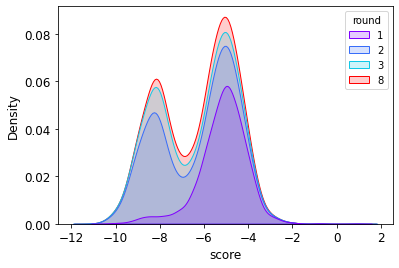

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
df1=pd.read_csv('files/sample_3500.csv')
df1['round']=1
df2=pd.read_csv('files/train2_data.csv')
df2['round']=2
df5=pd.read_csv('files/train3_data.csv')
df5['round']=3
df8=pd.read_csv('files/train8_data.csv')
df8['round']=8
df=pd.concat([df1,df2,df5,df8],ignore_index=True)
sns.kdeplot(x="score", hue='round',alpha=0.2,data=df,palette='rainbow',shade=True)
plt.show()

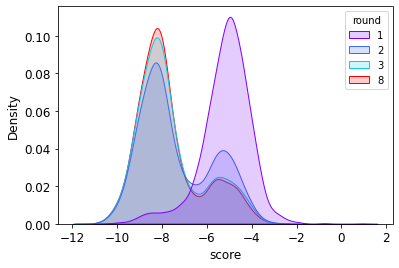

In [12]:
df0=pd.read_csv('files/sample_3500.csv')
df0['round']=1
df1=pd.read_csv('files/result1.csv')
df1=df1[:3500]
df1=df1.rename(columns={'actual':'score'})
df1['round']=2
df2=pd.read_csv('files/result2.csv')
df2=df2[:3500]
df2['round']=3
df2=df2.rename(columns={'actual':'score'})
df8=pd.read_csv('files/result8.csv')
df8=df8[:3500]
df8['round']=8
df8=df8.rename(columns={'actual':'score'})
df=pd.concat([df0,df1,df2,df8],ignore_index=True)
sns.kdeplot(x="score", hue='round',alpha=0.2,shade='True',data=df,palette='rainbow')
#plt.title('Rounds of top 3500 selected')
plt.show()